In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [3]:
marketing_customer_data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [4]:
def data_types(dataframe):

    numerical = dataframe.select_dtypes(include = ['int64', 'float64'])
    categorical = dataframe.select_dtypes(include = ['object'])

    return numerical, categorical

numerical_data, categorical_data = data_types(marketing_customer_data)

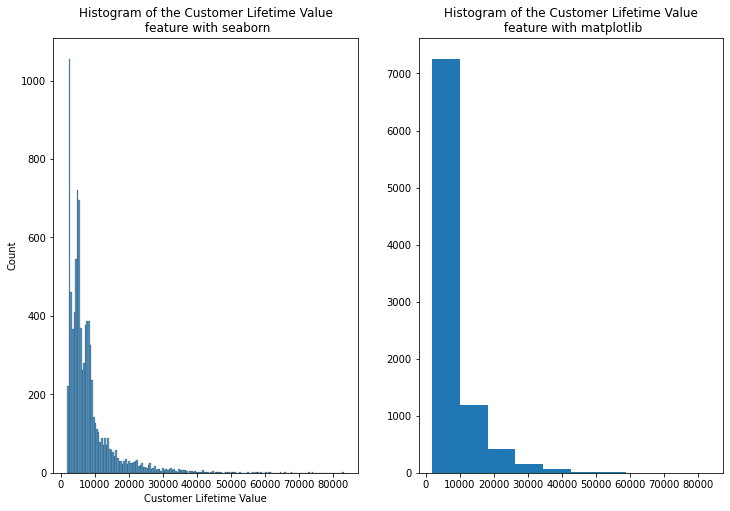

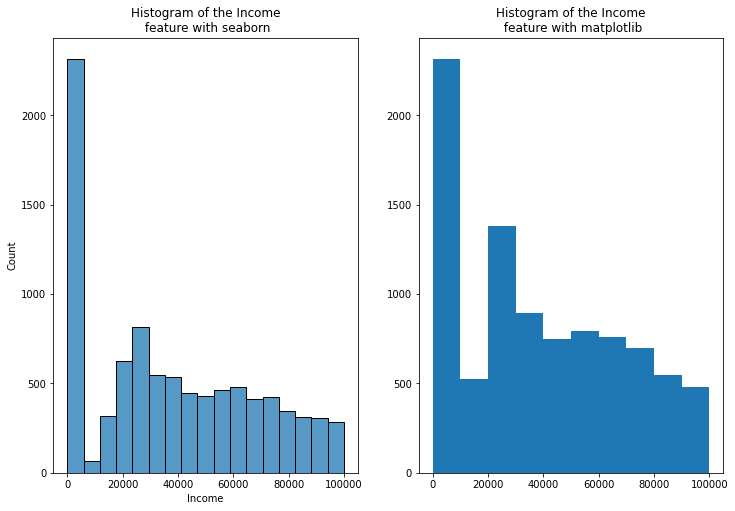

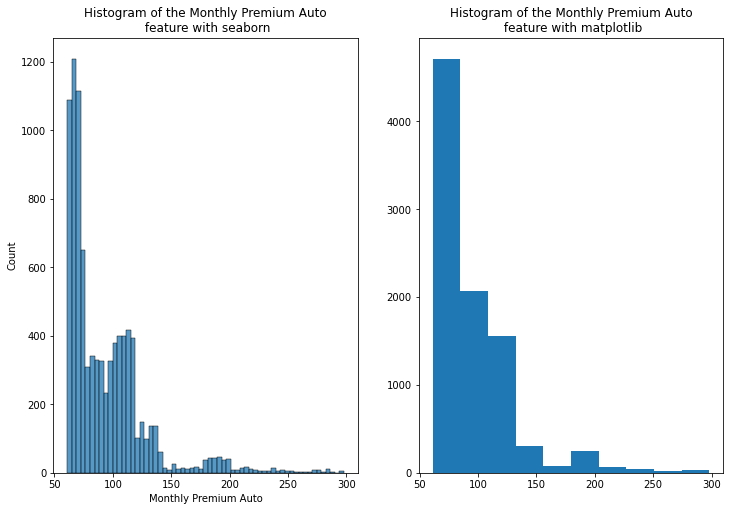

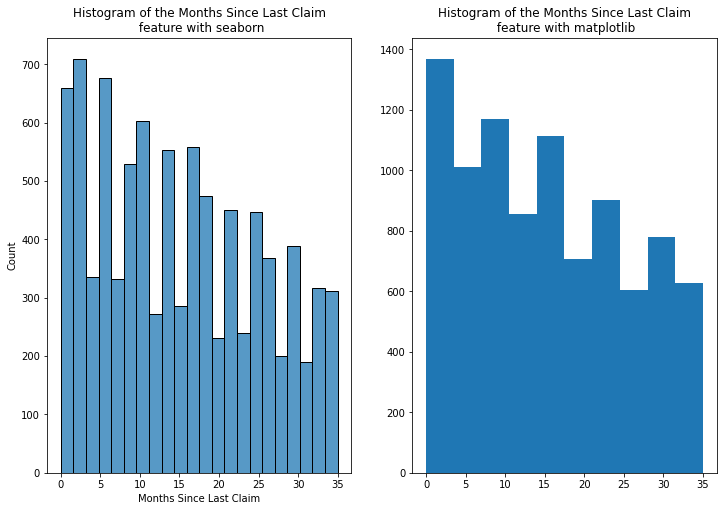

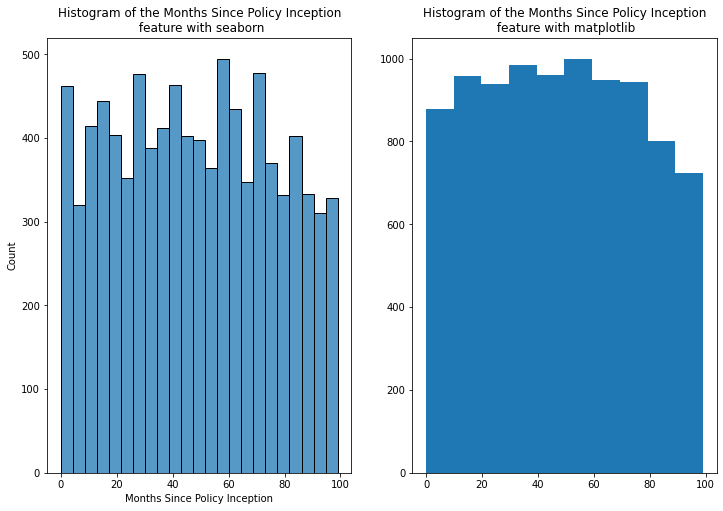

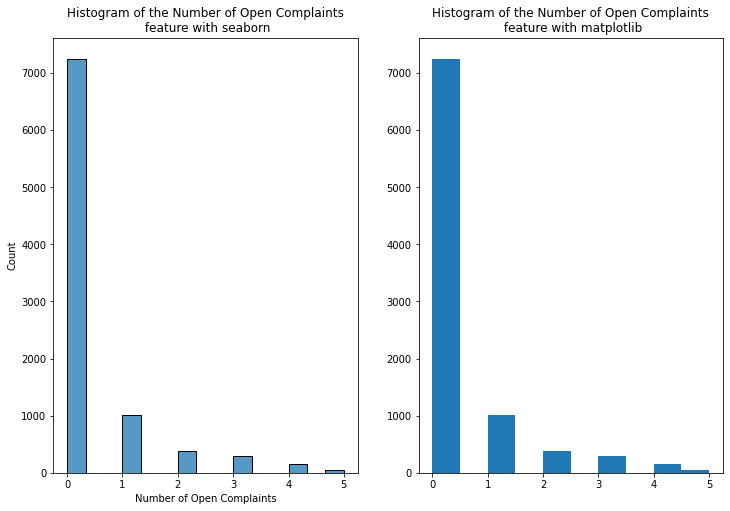

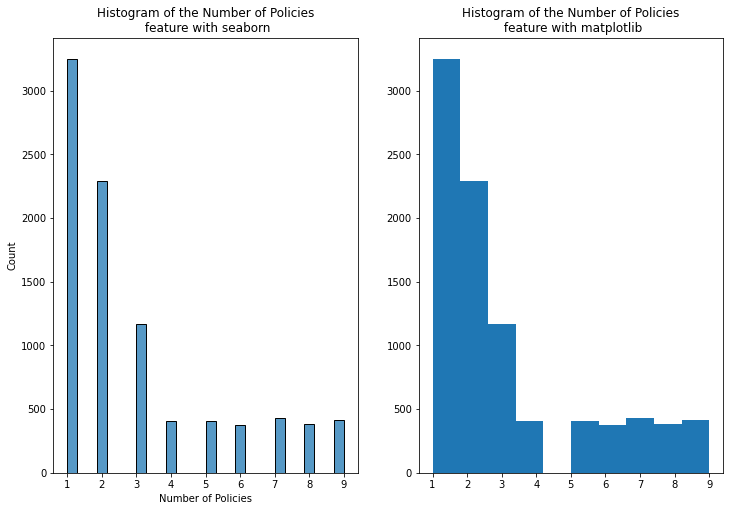

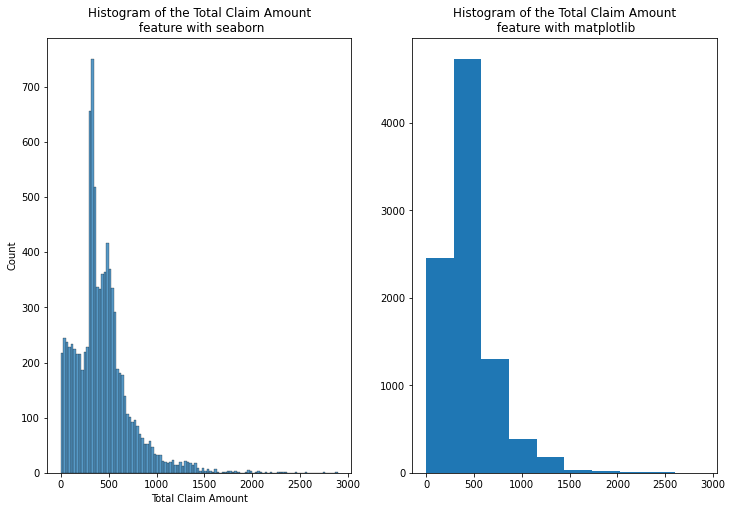

In [5]:
for column in numerical_data.columns:
    fig, axes = plt.subplots(1, 2, figsize = (12, 8))
    sns.histplot(ax = axes[0], x = column, data = numerical_data)
    axes[1].hist(x = numerical_data[column])
    axes[0].set_title(f'Histogram of the {column}\n feature with seaborn', fontsize = 12)
    axes[1].set_title(f'Histogram of the {column}\n feature with matplotlib', fontsize = 12)
    plt.show()

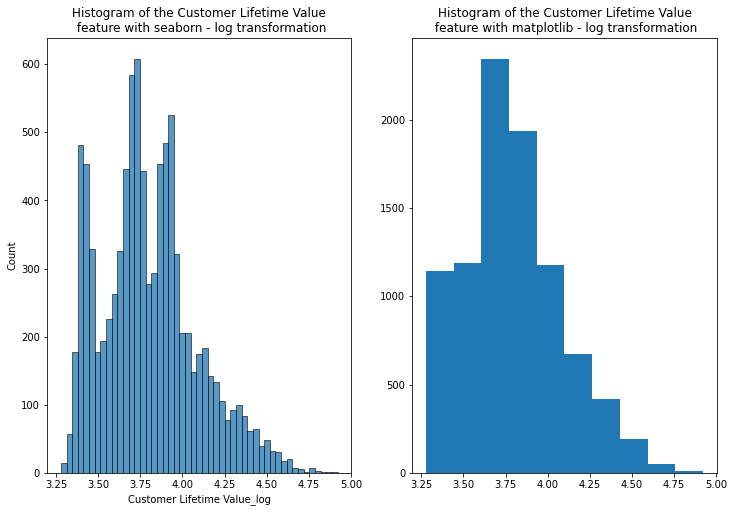

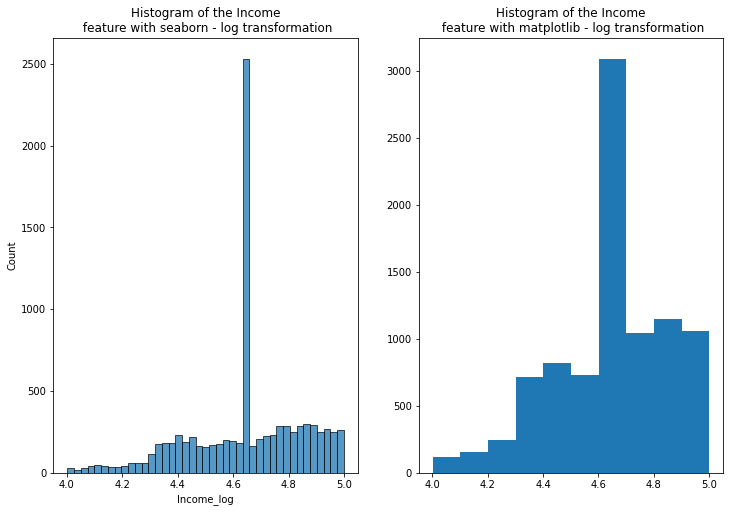

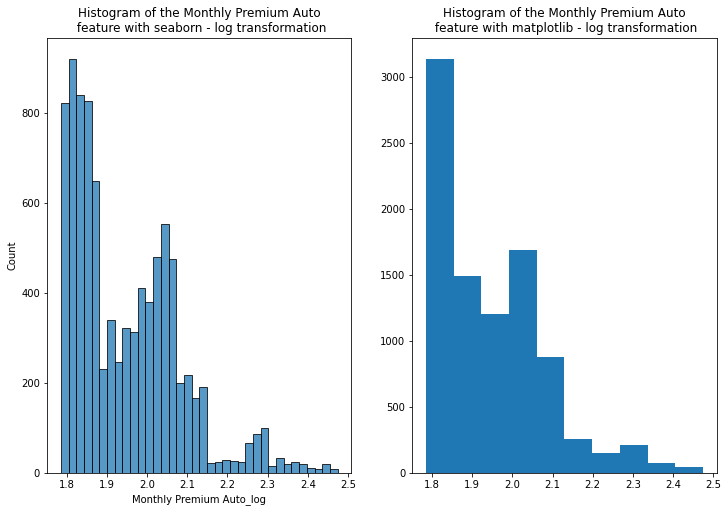

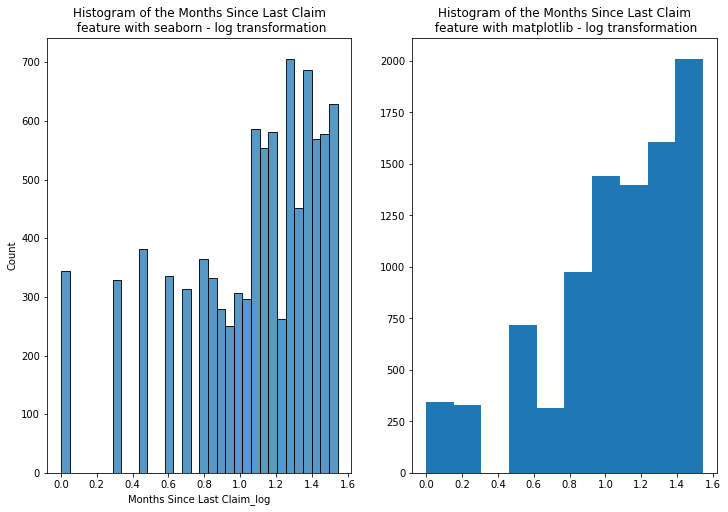

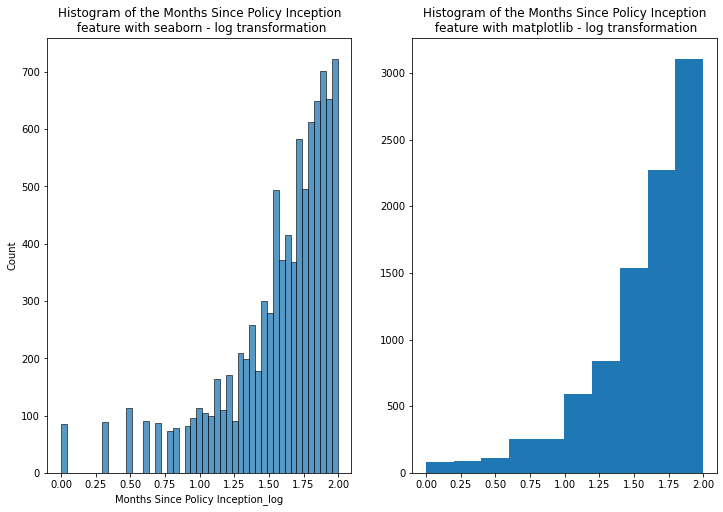

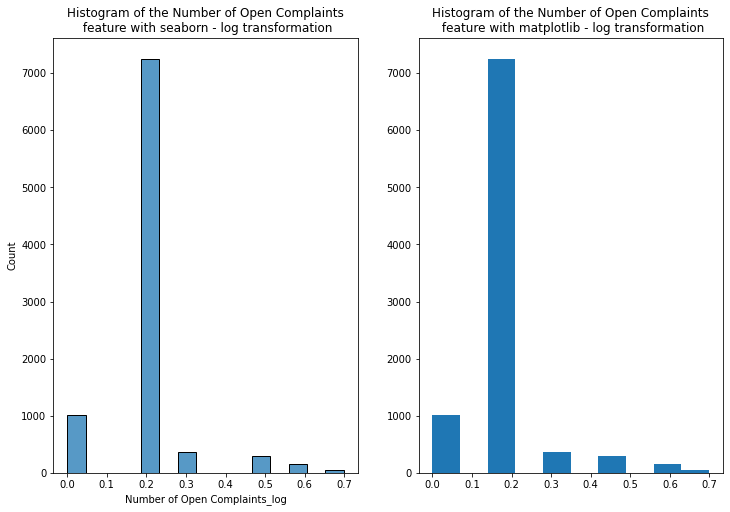

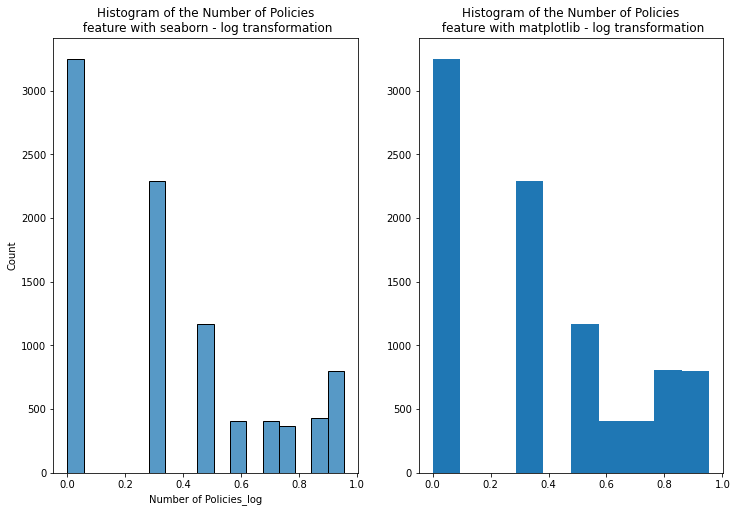

In [6]:
def log_transfom(num):

    num = np.log10(num)

    if np.isfinite(num):
        return num

    else:
        return np.NAN

numerical_data_copy = numerical_data.copy()

for column in numerical_data.columns:
    if column != 'Total Claim Amount':
        numerical_data_copy[f'{column}_log'] = list(map(log_transfom, numerical_data_copy[column]))
        numerical_data_copy[f'{column}_log'] = numerical_data_copy[f'{column}_log'].fillna(np.mean(numerical_data_copy[f'{column}_log']))
        numerical_data_copy = numerical_data_copy.drop(columns = [column])
        fig, axes = plt.subplots(1, 2, figsize = (12, 8))
        sns.histplot(ax = axes[0], x = f'{column}_log', data = numerical_data_copy)
        axes[1].hist(x = numerical_data_copy[f'{column}_log'])
        axes[0].set_title(f'Histogram of the {column}\n feature with seaborn - log transformation', fontsize = 12)
        axes[1].set_title(f'Histogram of the {column}\n feature with matplotlib - log transformation', fontsize = 12)
        plt.show()

In [7]:
numerical_data_copy # looking for the transformed data (log10)

,Total Claim Amount,Customer Lifetime Value_log,Income_log,Monthly Premium Auto_log,Months Since Last Claim_log,Months Since Policy Inception_log,Number of Open Complaints_log,Number of Policies_log
0,384.811147,3.441462,4.750308,1.838849,1.505150,0.698970,0.202313,0.000000
1,1131.464935,3.843827,4.644445,1.973128,1.113943,1.623249,0.202313,0.903090
2,566.472247,4.110166,4.688126,2.033424,1.255273,1.579784,0.202313,0.301030
3,529.881344,3.883426,4.644445,2.025306,1.255273,1.812913,0.202313,0.845098
4,138.130879,3.449277,4.641831,1.863323,1.079181,1.643453,0.202313,0.000000
...,...,...,...,...,...,...,...,...
9129,198.234764,4.369327,4.856976,1.863323,1.255273,1.949390,0.202313,0.301030
9130,379.200000,3.490873,4.334534,1.897627,1.146128,1.447158,0.202313,0.000000
9131,790.784983,3.911897,4.644445,1.929419,0.954243,1.568202,0.477121,0.301030
9132,691.200000,3.876474,4.341256,1.982271,1.531479,0.477121,0.202313,0.477121


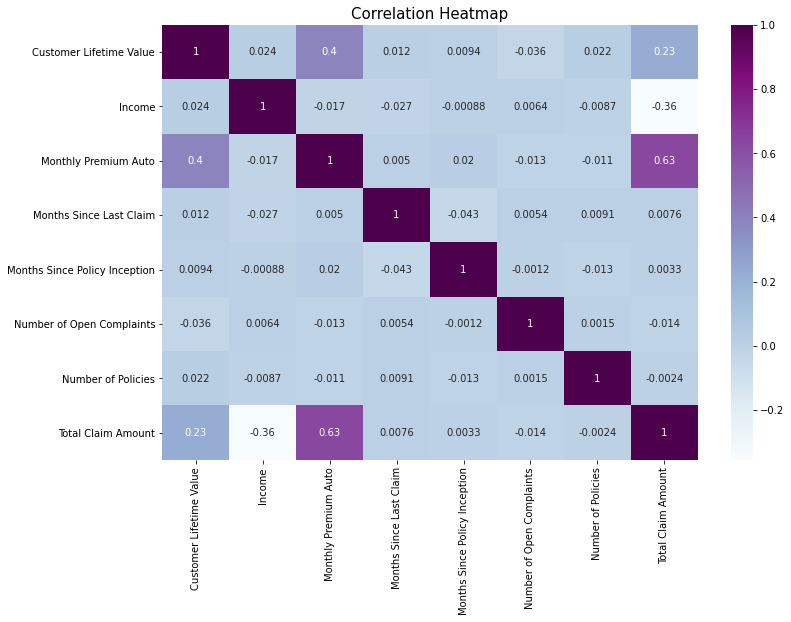

In [8]:
def correlation(dataframe):

    fig = plt.figure(figsize = (12,8))
    sns.heatmap(dataframe.corr(), annot = True, cmap = 'BuPu')
    plt.title('Correlation Heatmap', fontsize = 15)

    return plt.show()

correlation(numerical_data)

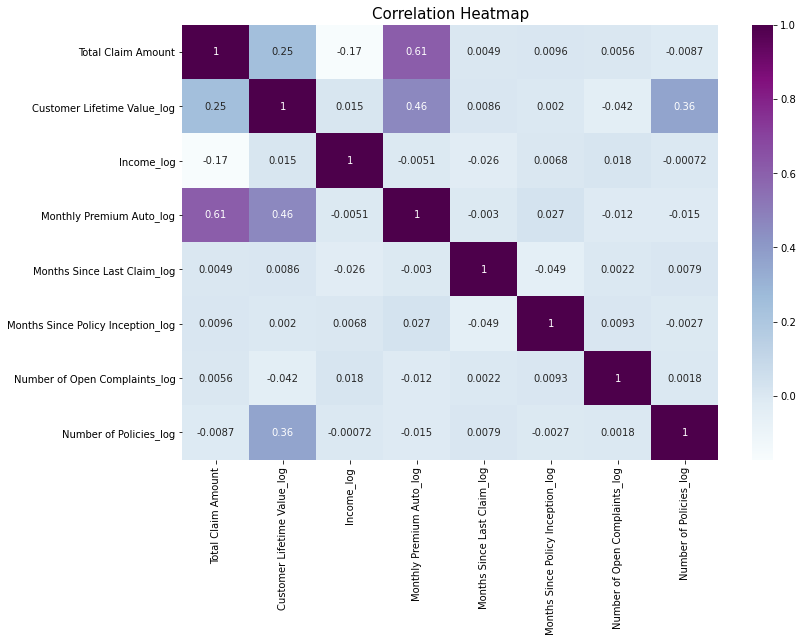

In [9]:
correlation(numerical_data_copy)

In [10]:
# We have 3 features that are highly correlated with the target: customer lifetime value, income and monthly premium auto.
# If we see the correlation between the inputs, we can see that customer lifetime value is correlated with monthly premium auto.
# But we are not going to drop one of them because the correlation is only 0.46. We only drop the none correlated features to the target.

numerical_data_copy = numerical_data_copy[['Income_log', 'Customer Lifetime Value_log', 'Monthly Premium Auto_log', 'Total Claim Amount']]

In [11]:
numerical_data_copy.to_csv('numerical_data_log.csv', index = False)
categorical_data.to_csv('categorical_data.csv', index = False)